# What Affects Rides? *(Analysis for Hypothetical Ride-Sharing Company Zuber)*

## Project Description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
You'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

## Objective: What Affects a Ride?

The goal for this project is to understand trends related to rides. My analysis will focus on **Chicago, IL (USA)** market and focus on two angles:
* Passenger Preferences
* Impact of External Factors (including exploring hypothesis on the impact of weather)

## Description of the data

*A database with info on taxi rides in Chicago:*

**neighborhoods table: data on city neighborhoods**
* name: name of the neighborhood
* neighborhood_id: neighborhood code

**cabs table: data on taxis**
* cab_id: vehicle code
* vehicle_id: the vehicle's technical ID
* company_name: the company that owns the vehicle

**trips table: data on rides**
* trip_id: ride code
* cab_id: code of the vehicle operating the ride
* start_ts: date and time of the beginning of the ride (time rounded to the hour)
* end_ts: date and time of the end of the ride (time rounded to the hour)
* duration_seconds: ride duration in seconds
* distance_miles: ride distance in miles
* pickup_location_id: pickup neighborhood code
* dropoff_location_id: dropoff neighborhood code

**weather_records table: data on weather**
* record_id: weather record code
* ts: record date and time (time rounded to the hour)
* temperature: temperature when the record was taken
* description: brief description of weather conditions, e.g. "light rain" or "scattered clouds"

## Table scheme
 
![Schema](schema.jpg) 

Note: there isn't a direct connection between the tables trips and weather_records in the database. But you can still use JOIN and link them using the time the ride started (trips.start_ts) and the time the weather record was taken (weather_records.ts).


## Agenda  <a class="anchor" id="agenda"></a>

*Note: Only the linked sections are included in this Jupyter Notebook.*

1. [Background](#background)
2. Parse Chicago, IL weather records from November 2017 from [THIS](https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html) website. Note: code saved in **data_parsing.py**
3. Exploratory Data Analysis I (SQL). Note: queries saved in **eda_1.sql**
    * Number of trips by company Nov 15-16, 2017
    * Number of trips for companies that include 'Yellow' or 'Blue' in name Nov 1-7, 2017
    * Number of November 2017 trips split by 3 company segments: 'Flash Cab', 'Taxi Affiliation Service', 'Other'
4. [Conclusion(s) from Exploratory Data Analysis I](#eda1)
5. Hypothesis Analysis (SQL). Note: queries saved in **eda_1.sql**
    * Identify neighborhoods codes for 'O'Hare' and 'Loop' neighborhoods 
    * Create weather_condition column in table
    * Number of Trips with pickups in 'O'Hare' or 'Loop' neighborhoods by hour and weather condition ('bad' or 'good')
6. [Conclusion(s) from Hypothesis Analysis](#hcomp)
7. [Data Upload and PreProcessing](#data)
8. [Exploratory Data Analysis II](#eda2)
    * Identify ride trends by neighborhood
9. [Hypothesis Test](#htest): "The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays."
10. [Conclusion(s)](#conclusion)


## Background <a class="anchor" id="background"></a>



Chicago, Illinois is the [third most populous city in the United States](https://www.census.gov/content/dam/Census/newsroom/releases/2017/cb17-81-table3-most-populous.pdf) behind New York City and Los Angeles with 2.7 million residents and hence, the [most populous city in the Midwest](https://www.chicagotribune.com/news/breaking/ct-census-illinois-cities-population-loss-20200608-elh5s7pq7vcjriqnlii6hyaiea-story.html). If Zuber would like presense in the Midwest, understanding the Chicago ecosystem is imperative. 

We can assume a close reflection of potential success for a ride-sharing company in Chicago is the city's current taxicab system for which there is public data available, especially as Chicago is ["home of the nation's second largest cab industry"](https://www.nytimes.com/2019/10/04/nyregion/taxi-medallions-chicago.html#:~:text=Only%20about%204%2C300%20of%20the,looking%20for%20a%20new%20job.) which in the 2000s reached 7,000 cabs at once. Chicago taxis are operated by private companies and licensed by the city's [Business Affairs and Consumer Protection](https://www.chicago.gov/city/en/depts/bacp/supp_info/medallion_owner_information.html) agency. Unlike other cities, Chicago taxis can be [any color](https://codelibrary.amlegal.com/codes/chicago/latest/chicago_il/0-0-0-2490014) (but matching their affiliated private company if not independent). 

Chicago is made up of multiple neighborhoods. A common trip expected will be between these two areas:
* **O'Hare International Airport**: Any airport in a large city is expected to be popular, but this is not just any airport. Chicago's O'Hare International Airport is the [busiest airport in the United States](https://www.dallasnews.com/business/airlines/2019/02/05/there-s-a-new-no-1-in-the-nation-s-busiest-airports-rankings/) based on total flights carrying [374,351 passengers](https://www.flychicago.com/SiteCollectionDocuments/Business/FactAndFigures/AirTraffic/1117%20ORD%20SUMMARY.pdf) just in the November 2017 month alone. 
* **Loop Neighborhood**: Chicago's Loop Neighborhood is what many associate with Downtown Chicago. As per Choose Chicago (the city's official destination marketing association), Loop is ["the heart of the city... bursting with iconic Chicago attractions, including historic architecture, river cruises, Millennium Park, the Chicago Riverwalk, a vibrant theatre district, incredible dining, shopping along State Street"](https://www.choosechicago.com/neighborhoods/loop/)

#### Unknown / Assumption

What is unknown in our analysis is what is Zuber's business model? As requested, we will be looking at particular taxi cab companies but it is unclear if it is to model Zuber after (copy), partner with them, or recruit their drivers. Assumingly, Zuber is looking to recruit their drivers as other ride-sharing companies do

## Conclusion from Exploratory Data Analysis I <a class="anchor" id="eda1"></a>

I completed the three specific tasks requested (as outlined in the [Agenda](#agenda) section) through the use of SQL queries against a database outside this notebook. This is what was found:
* After taking a sample of two days (11/15/17 - 11/16/17), the **2 most successful companies (based on trip count) are 'Flash Cab' and 'Taxi Affiliate Service'**.
* If we look at these two companies over a full week (11/1/17 - 11/7/17), **'Flash Cab' and 'Taxi Affiliation Services' combined make up 23.24% of all trips within a week** despite there being a total of 64 companies. ('Flash Cab' has ~15% of all trips while 'Taxi Affiliation Services' has ~8%)
* As mentioned, Chicago's taxis could be any color but we can see companies brand themselves around colors that help recognition. **If we look at trips from companies that use either the word 'Yellow' or the word 'Blue' in their name, companies with 'Yellow' executed 72% of such trips** after looking at data for a full week (11/1/17-11/7/17). The strategy of associating with the color yellow, a common taxi color in other cities, seems successful. As a matter of fact, it was in Chicago that the tradition of yellow cabs originated. The ['Yellow Cab Company'](https://yellowcabchicago.com/about-us/) founded in 1907 in Chicago is North America's oldest and largest taxicab company. Its founder John Hertz ["got the idea for the color from a study by a local university that found that yellow with a touch of red was the most visible color over greater distances"](https://time.com/4640097/yellow-taxi-cabs-history/). John Hertz would continue his streak. He is perhaps best known for [purchasing Chicago-based Rent-A-Car in 1923 (only 5 years old then after being founded in 1918)](https://www.hertz.com/blog/automotive/how-22-year-old-with-12-modelt-ts-created-hertz) which immediately renamed to 'Hertz Drive-Ur-Self System' and it is now the publicly traded company 'The Hertz Corporation'.


**Additional Background Notes post EDA I**: 
* Cabs from 'Taxi Affiliation Services' (TAS) are assumingly yellow as the company was established in 2006 by some of Yellow Cab's directors post-bankrupcy with the goal of taking on the business and render 'Yellow Cab' insolvent [(Source)](https://cookcountyrecord.com/stories/511382483-yellow-cab-bankruptcy-trustee-alleges-company-officials-tried-to-foil-suit-judgment-officials-vehemently-deny). In addition, a 2012 lawsuit from taxi plaintiffs (including TAS) against Uber Technologies, Inc identified TAS as part of the 'Yellow Group' [(Source)](https://docs.justia.com/cases/federal/district-courts/illinois/ilndce/1:2012cv07967/275001/1)
* "Flash Cab" taxis are white and blue as per [its website](https://flashcab.com/).


## Conclusion from Hypothesis Analysis <a class="anchor" id="hcomp"></a>

I completed the three specific tasks requested (as outlined in the [Agenda](#agenda) section) through the use of SQL queries against a database outside this notebook. Below is the conclusion:

In testing the hypothesis that **"the duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays"**, I confirmed this is a true statement based on observations from November 2017 (as available). The average trip duration on Saturdays with 'bad' weather (rain or storm) is ~ 40 minutes (2427.21 seconds) while the average trip duration on 'good' weather days is ~33 minutes (1999.68 seconds). Hence, **the same Saturday trip from the Loop to O'Hare is ~7 minutes longer (427.53 seconds) when there is 'bad' weather compared to 'good' weather days**.

*Note: At this point, I can't recommend business action on this finding as I have not confirmed if the difference observed is statistically significant.*

## Data Upload and PreProcessing <a class="anchor" id="data"></a>

In [1]:
import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene

In [2]:
companies = pd.read_csv('./project_sql_result_01.csv')
dropoffs = pd.read_csv('./project_sql_result_04.csv')
loop_ohare = pd.read_csv('./project_sql_result_07.csv')

**Companies**

In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Correct data types

In [4]:
companies.isna().sum()

company_name    0
trips_amount    0
dtype: int64

No nulls

In [5]:
# is there one line by company?
companies['company_name'].nunique() == len(companies)

True

1 line per company. 64 companies represented

In [6]:
companies.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
companies['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

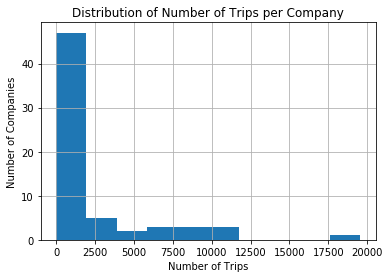

In [8]:
companies['trips_amount'].hist().set_title('Distribution of Number of Trips per Company')
plt.xlabel("Number of Trips")
plt.ylabel("Number of Companies");

Over 75% companies have less than 2,106 trips. There are some outliers above that reaching up to 19558 trips.

**Dropoffs**

In [9]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
dropoffs.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
dropoffs.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [12]:
# is there one line by dropoff location?
dropoffs['dropoff_location_name'].nunique() == len(dropoffs)

True

In [13]:
# number of dropoff locations
len(dropoffs)

94

This dataframe represents data for 94 dropoff points.

No nulls but average trips is a float which should be an integer as it represented average numnber of trips. 

In [14]:
dropoffs['average_trips'] =  dropoffs['average_trips'].astype(int)

In [15]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


Now average trips changed to integer

In [16]:
dropoffs.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


In [17]:
dropoffs['average_trips'].describe()

count       94.000000
mean       599.478723
std       1714.555974
min          1.000000
25%         14.000000
50%         51.500000
75%        298.750000
max      10727.000000
Name: average_trips, dtype: float64

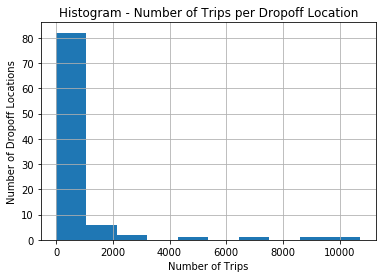

In [18]:
dropoffs['average_trips'].hist().set_title('Histogram - Number of Trips per Dropoff Location')
plt.xlabel("Number of Trips")
plt.ylabel("Number of Dropoff Locations");

Over 75% dropoff locations have less than 298 trips. There are some outliers above that reaching up to 10727 trips.

In [19]:
dropoffs.columns

Index(['dropoff_location_name', 'average_trips'], dtype='object')

Average Trips is not an appropriate name for the column as it represents number of trips. I will call it trips_amount to match companies df

In [20]:
dropoffs.rename(columns={"average_trips": "trips_amount"},inplace=True)

In [21]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
trips_amount             94 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


**Loop-Ohare**

In [22]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [23]:
loop_ohare.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [24]:
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


No nulls. Duration seconds will changed to integer as rates in Chicago are [based on seconds](https://www.chicago.gov/city/en/depts/bacp/supp_info/2012_passenger_information.html) and the data is already in seconds. No need for partial.

In [25]:
loop_ohare['duration_seconds'] = loop_ohare['duration_seconds'].astype(int)

In [26]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int32
dtypes: int32(1), object(2)
memory usage: 21.0+ KB


Duration seconds corrected to integer

In [27]:
#is start_ts distinct?

len(loop_ohare) == loop_ohare['start_ts'].nunique()

False

Oh Oh. Start_ts is not distinct. Further research is needed to understand what this data represents.

In [28]:
#What is in weather conditions? Expect good & bad only
loop_ohare['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

Now that we know correct two options. What is distribution?

In [29]:
loop_ohare['weather_conditions'].value_counts(normalize=True)

Good    0.831461
Bad     0.168539
Name: weather_conditions, dtype: float64

~83% of observations are for 'good' weather and ~17% are for 'bad' weather.

Let's change weather condition to category data type

In [30]:
loop_ohare['weather_conditions'] = loop_ohare['weather_conditions'].astype("category")

In [31]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null category
duration_seconds      1068 non-null int32
dtypes: category(1), int32(1), object(1)
memory usage: 13.8+ KB


Weather conditions changed to category and confirmed.

Let's make start_ts a timestamp

In [32]:
loop_ohare.head(1)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410


In [33]:
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'])

In [34]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null category
duration_seconds      1068 non-null int32
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 13.8 KB


All data types correct now.

Before moving on, let's confirm what is/not represented by the loop_ohare. 

In [35]:
loop_ohare['start_ts'].value_counts().sort_values(ascending=False).head()

2017-11-11 10:00:00    48
2017-11-04 14:00:00    46
2017-11-04 12:00:00    46
2017-11-11 06:00:00    45
2017-11-11 08:00:00    43
Name: start_ts, dtype: int64

It seems that for each timestamp there are many lines so now we can confirm loops_ohare df has one one line per trip and characteristics for that trip (weather and duration in seconds). No unique identifier per trip besides index.

In [36]:
loop_ohare['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

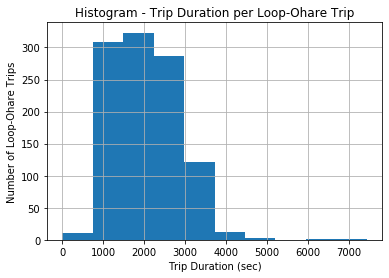

In [37]:
loop_ohare['duration_seconds'].hist().set_title('Histogram - Trip Duration per Loop-Ohare Trip')
plt.xlabel("Trip Duration (sec)")
plt.ylabel("Number of Loop-Ohare Trips");

Duration seconds has some outliers on the top end. 

## Exploratory Data Analysis II <a class="anchor" id="eda2"></a>

**Instructions**

In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs:

project_sql_result_01.csv. It contains the following data:
* company_name: taxi company name
* trips_amount: the number of rides for each taxi company on November 15-16, 2017.

project_sql_result_04.csv. It contains the following data:
* dropoff_location_name: Chicago neighborhoods where rides ended
* average_trips: the average number of rides that ended in each neighborhood in November 2017.

For these two datasets you now need to
* import the files - refer to [Data Upload and Preprocessing step earlier](#data)
* study the data they contain - refer to [Data Upload and Preprocessing step earlier](#data)
* make sure the data types are correct
* identify the top 10 neighborhoods in terms of drop-offs
* make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
* draw conclusions based on each graph and explain the results


**Progress:** 

Now, these two dataframes already created and prepared in [Data Upload and Preprocessing step earlier](#data) and are saved in the "companies" and "dropoffs" variables.

**Make sure the data types are correct**

In [38]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [39]:
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
trips_amount             94 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


All data types are correct.

**Identify the top 10 neighborhoods in terms of drop-offs**

In [40]:
#reconfirm 1 line per dropoff location
dropoffs['dropoff_location_name'].nunique() == len(dropoffs)

True

We confirmed dropoffs contains one line per dropoff location but... Does dropoff location contain names of neighborhoods?

In [41]:
dropoffs['dropoff_location_name'].unique() 

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

Yes, dropoff_location_name seems to be names of Chicago Neighborhoods. It is fitting to rename to clarify

In [42]:
dropoffs.rename(columns={"dropoff_location_name": "dropoff_neighborhood"},inplace=True)

In [43]:
# confirm rename
dropoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_neighborhood    94 non-null object
trips_amount            94 non-null int32
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


In [44]:
dropoffs.sort_values(by=['trips_amount'], ascending=False).head(10)

,dropoff_neighborhood,trips_amount
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


Above are the top 10 neighborhoods based on number of trips: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campud, Gold Coast, and Sheffield & De Paul.

**Make graphs I: top 10 neighborhoods by number of dropoffs (conclusions below graph)**

In [45]:
#How many neighborhoods?
dropoffs['dropoff_neighborhood'].nunique()

94

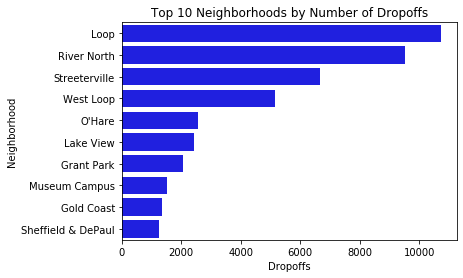

In [46]:
#Top 10 neighborhoods by number of dropoffs
data = dropoffs.sort_values(by=['trips_amount'], ascending=False).head(10)
sns.barplot(x="trips_amount", y="dropoff_neighborhood", data=data, color="Blue").set_title('Top 10 Neighborhoods by Number of Dropoffs')
plt.xlabel("Dropoffs")
plt.ylabel("Neighborhood");

Above are the top 10 neighborhoods by number of trips. It is clear there are some neighborhoods that are MUCH more popular based on dropoff trips (with Loop at the top being more that double the fourth). Upon a closer look at where these neighborhoods are actually located from [THIS MAP](https://www.choosechicago.com/neighborhoods/), a pattern becomes clear. The top 4 neighborhoods are adjacent. With Loop being the most popular, the next 3 neighborhoods surround it. We can conclude that **the most popular area for trips is in or around the Loop neighborhood** or the center of Downtown Chicago.

In [47]:
total_trips = dropoffs['trips_amount'].sum()
dropoffs['% of total trips'] = dropoffs['trips_amount'] / total_trips

In [48]:
dropoffs.sort_values(by=['% of total trips'], ascending=False).head(10)

,dropoff_neighborhood,trips_amount,% of total trips
0,Loop,10727,0.190360
1,River North,9523,0.168994
2,Streeterville,6664,0.118259
3,West Loop,5163,0.091622
4,O'Hare,2546,0.045181
5,Lake View,2420,0.042945
6,Grant Park,2068,0.036699
7,Museum Campus,1510,0.026796
8,Gold Coast,1364,0.024205
9,Sheffield & DePaul,1259,0.022342


In [49]:
# Sum of first 4 rows
dropoffs.iloc[0:4]['% of total trips'].sum()

0.5692356834838779

The top 4 neighborhoods which are in or around Loop make up ~57% of the total trips (and there are potentially more neighborhoods we can attribute to the Loop surrounding area making this bigger). This small area is serviced well by cab services, but in such a populous city... **are the areas not surrounding Loop being serviced well?**. Zuber could go head to head with cab companies (or partner with them) in the Loop area but there might be an even better **opportunity in such a populous city servicing outside the Loop area**.

**Make graphs II: taxi companies and number of rides (conclusions below graph)**

In [50]:
#How many companies?
companies['company_name'].nunique()

64

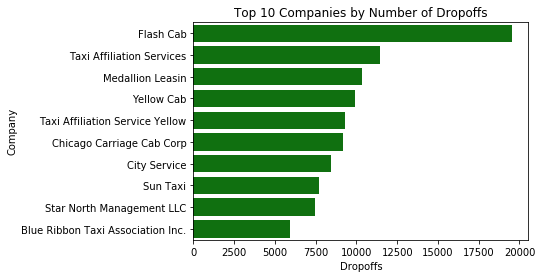

In [51]:
#Top 10 companies by number of dropoffs
data = companies.sort_values(by=['trips_amount'], ascending=False).head(10)
sns.barplot(x="trips_amount", y="company_name", data=data, color="Green").set_title('Top 10 Companies by Number of Dropoffs')
plt.xlabel("Dropoffs")
plt.ylabel("Company");

Flash Cab is BY FAR the most popular cab company, almost double the next one. 

In [52]:
total_trips = companies['trips_amount'].sum()
companies['% of total trips'] = companies['trips_amount'] / total_trips

In [53]:
companies.sort_values(by=['% of total trips'], ascending=False).head(10)

,company_name,trips_amount,% of total trips
0,Flash Cab,19558,0.142436
1,Taxi Affiliation Services,11422,0.083183
2,Medallion Leasin,10367,0.075500
3,Yellow Cab,9888,0.072012
4,Taxi Affiliation Service Yellow,9299,0.067722
5,Chicago Carriage Cab Corp,9181,0.066863
6,City Service,8448,0.061525
7,Sun Taxi,7701,0.056084
8,Star North Management LLC,7455,0.054293
9,Blue Ribbon Taxi Association Inc.,5953,0.043354


In [54]:
companies.loc[0]['% of total trips']

0.14243578446009425

It is clear **Flash Cab is the leader in this market. Zuber should partner with or model their service after Flash Cab.**. Without domain experience, it is hard for me to know exactly why/how they have reached this level of success. **Zuber should consider hiring a consultant with domain experience in the Chicago taxi sector to get a clear understanding of what differentiates Chicago taxi companies**. From a quick look at the Flash Cab website versus the next few companies, it is clear Flash Cab takes care of their brand and marketing with a robust site, app, distict cab colors (white/blue), and good user interface. Although this inclination may be true, I again reiterate this is not my domain. 

## Hypothesis Test <a class="anchor" id="htest"></a>

**Instructions**

project_sql_result_07.csv — the result of the last query. - **Now saved as 'loop_ohare' variable**. Refer to [Data Upload and Preprocessing step earlier](#data)

It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
* start_ts
    * pickup date and time
* weather_conditions
    * weather conditions at the moment the ride started
* duration_seconds
    * ride duration in seconds

Test the hypothesis:

**"The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays."**

Set the significance level (alpha) value independently.

Explain:
* how you formed the null and alternative hypotheses
* what criterion you used to test the hypotheses and why


In [55]:
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


In [56]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null category
duration_seconds      1068 non-null int32
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 13.8 KB


In [57]:
loop_ohare['weather_conditions'].value_counts(normalize=True)

Good    0.831461
Bad     0.168539
Name: weather_conditions, dtype: float64

Most trips are on good weather but we have a decent amount of bad weather days (~17%) that will make this comparison worthwile.

Does data include only Saturdays?

In [58]:
loop_ohare.head(1)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410


In [59]:
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null category
duration_seconds      1068 non-null int32
dtypes: category(1), datetime64[ns](1), int32(1)
memory usage: 13.8 KB


In [60]:
loop_ohare['dow'] = loop_ohare['start_ts'].dt.dayofweek

In [61]:
loop_ohare['dow'].value_counts()

5    1068
Name: dow, dtype: int64

The dataset only contains day of week 5 and as per [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html), 5 represents Saturday. Hence, data already sliced for just Saturday confirmed

Are there outliers? 

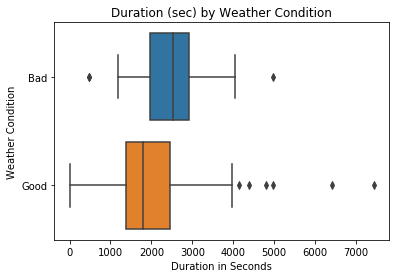

In [62]:
sns.boxplot(x="duration_seconds", y="weather_conditions", data=loop_ohare).set_title('Duration (sec) by Weather Condition')
plt.xlabel("Duration in Seconds")
plt.ylabel("Weather Condition");

There are outliers! As hypothesis test uses averages, these outliers must be removed first. 

In [63]:
#Good Benchmarks
condition = 'Good'
good_Q1 = loop_ohare.loc[loop_ohare['weather_conditions'] == condition]['duration_seconds'].quantile(0.25)
good_Q3 = loop_ohare.loc[loop_ohare['weather_conditions'] == condition]['duration_seconds'].quantile(0.75)
good_IQR = good_Q3 - good_Q1
print('Good')
print('Good Q1: ', good_Q1)
print('Good Q3: ', good_Q3)
print('Good IQR: ', good_IQR)

Good
Good Q1:  1389.75
Good Q3:  2460.0
Good IQR:  1070.25


In [64]:
good_bottom_cutoff = good_Q1 - (1.5*good_IQR)
good_top_cutoff = good_Q3 + 1.5 * good_IQR
if good_bottom_cutoff < 0:
    good_bottom_cutoff = 0
print('min: ',good_bottom_cutoff)
print('max: ',good_top_cutoff)

min:  0
max:  4065.375


In [65]:
#Bad Benchmarks
condition = 'Bad'
bad_Q1 = loop_ohare.loc[loop_ohare['weather_conditions'] == condition]['duration_seconds'].quantile(0.25)
bad_Q3 = loop_ohare.loc[loop_ohare['weather_conditions'] == condition]['duration_seconds'].quantile(0.75)
bad_IQR = bad_Q3 - bad_Q1
print('Bad')
print('Bad Q1: ', bad_Q1)
print('Bad Q3: ', bad_Q3)
print('Bad IQR: ', bad_IQR)

Bad
Bad Q1:  1962.0
Bad Q3:  2928.0
Bad IQR:  966.0


In [66]:
bad_bottom_cutoff = bad_Q1 - (1.5*bad_IQR)
bad_top_cutoff = bad_Q3 + 1.5 * bad_IQR
if bad_bottom_cutoff < 0:
    bad_bottom_cutoff = 0
print('min: ',bad_bottom_cutoff)
print('max: ',bad_top_cutoff)

min:  513.0
max:  4377.0


In [67]:
loop_ohare_without_outliers = loop_ohare.copy()

In [68]:
# boolean to identify outliers to drop
def outlier_drop (row):
    condition = row['weather_conditions']
    duration = row['duration_seconds']
    if condition == 'Good':
        if (duration < good_bottom_cutoff) or (duration > good_top_cutoff):
            return 1
        else:
            return 0
    else: #bad
        if (duration < bad_bottom_cutoff) or (duration > bad_top_cutoff):
            return 1
        else:
            return 0

In [69]:
loop_ohare['drop?'] = loop_ohare.apply(outlier_drop, axis=1)

In [70]:
loop_ohare['drop?'].value_counts(normalize=True)

0    0.991573
1    0.008427
Name: drop?, dtype: float64

Dropping 0.08% of data. Records with ['drop?] column as 1

In [71]:
loop_ohare = loop_ohare.loc[loop_ohare['drop?']==0]

Check if outliers present:

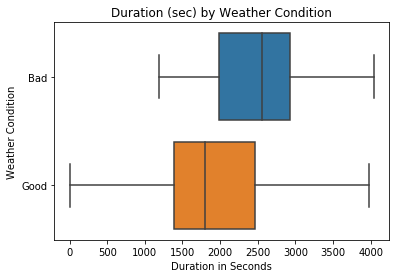

In [72]:
sns.boxplot(x="duration_seconds", y="weather_conditions", data=loop_ohare).set_title('Duration (sec) by Weather Condition')
plt.xlabel("Duration in Seconds")
plt.ylabel("Weather Condition");

Now, no outliers. Proceeding with hypothesis test

In [73]:
#Remove extra columns
loop_ohare.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds', 'dow', 'drop?'], dtype='object')

In [74]:
del loop_ohare['drop?']

In [75]:
del loop_ohare['dow']

In [76]:
loop_ohare.columns

Index(['start_ts', 'weather_conditions', 'duration_seconds'], dtype='object')

Claim: **"The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays."**

The null hypothesis will be what we are trying to disprove, that the duration is the same on good vs bad days. Hence:

* H0 (Null Hypothesis): Average Trip Duration on Good Weather Days == Average Trip Duration on Bad Weather Days
* HA (Alternative Hypothesis): Average Trip Duration on Good Weather Days != Average Trip Duration on Bad Weather Days

Confidence Level: 95% (Alpha 5%) -- 0.05 Alpha chosen as it is standard practice and I don't have domain experience to alter it.

In [77]:
alpha = .05

a = loop_ohare.loc[loop_ohare['weather_conditions']=='Good']['duration_seconds']
b = loop_ohare.loc[loop_ohare['weather_conditions']=='Bad']['duration_seconds']

results = st.ttest_ind(a, b)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  3.903810670914357e-15
We reject the null hypothesis


As the p-value is less than 0.05, there is a significant difference between the trip durations on good weather days vs bad weather days (and very low chance this difference was caused by randomness). Hence, we can reject the null hypothesis there isn't a difference and **accept the alternative hypothesis that there is a difference in trip duration on good weather days vs bad weather days, in support of the claim**. 

In [78]:
avg_duration_good_weather = loop_ohare.loc[loop_ohare['weather_conditions']=='Good']['duration_seconds'].mean()
avg_duration_bad_weather = loop_ohare.loc[loop_ohare['weather_conditions']=='Bad']['duration_seconds'].mean()
avg_duration_bad_weather > avg_duration_good_weather

True

As we have established the difference is significant, now I can look further and see which type of weather has a longer duration and confirm that **trip duration is LONGER on bad weather days than on good weather days**. 

**T-Test Validity Check**

One of the t-test assumptions is **equality/homegeneity of variance** (the groups have equal varicance, to validate the results of the t-test performed, let's check if this assumption is met with the use of the [Levene Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html)

The null hypothesis is what we are trying to prove wrong or reject. We want to check if we should reject the claim the variances are the same which would invalidate our test.

* H0 (Null Hypothesis): Variance of Good Weather Days == Variance of Bad Weather Days
* HA (Alternative Hypothesis): Variance of Good Weather Days != Variance of Bad Weather Days

The Levene test takes 3 attributes for "center". To be more confident on the result, I will test the 3 attributes.

In [79]:
stat, p = levene(a, b) #center="median" is default
p

0.3563611473946102

In [80]:
stat, p = levene(a, b, center="mean")
p

0.23877881139560467

In [81]:
stat, p = levene(a, b, center="trimmed")
p

0.4374161297678466

In all cases, the p-value is not less than .05 so we fail to reject the null hypothesis. Hence, I don't have sufficient evidence to say the variance in trip duration of good weather is significantly different than the variance in trip duration of bad weather days (which would have invalidated the t-test performed). Hence, I will accept the findings of the earlier t-test as the assumption of equality of variance was not disproven.

## Conclusion <a class="anchor" id="conclusion"></a>

A new ride-sharing company **Zuber** is looking to launch in Chicago, IL (USA). As an analysr for Zuber, I have been tasked with answering "What Affects a Ride?" by finding patterns relating to passenger preference and the impact of external factors on rides. 

After analyzing a public data sample of taxicab trips from November 2017 and weather reports, the following insights were discovered: 
* **Flash Cab is the most successful taxicab company in Chicago** doing almost double the trips as the next company (Taxi Affiliation Services). Due to its overwhelming success, Zuber should consider looking more closely into what this company is doing to achieve such success, perhaps by hiring a consultant with domain experience in the local cab industry. In addition, Zuber should recruit drivers from Flash Cab for its service as they will come in 'Flash Cab' branded cars which due to its popularity might be more trusted.
* Although Chicago cabs can be any color, **taxi  use color strategically to be better identified** (or perhaps to be identified with successful competitors) which became evident as many used it as part of branding in their name and particularly relied on the "yellow" color (a natural choice due to its popularity in other cities and its origin in Chicago).  If possible, Zuber should recruit drivers with taxi cab colors identified with more reputable companies (like Blue/white for Flash Cab or the recognized yellow if others).
* Although Chicago boasts over 90 distinct neighborhoods, **most trips end in the Loop area or surrounding within Downtown Chicago**. Zuber could consider going head to head with these companies in that area or perhaps an even better opportunity of trying to encourage customers outside this area to use Zuber as assumingly they might not be serviced well by the current system. 
* **Weather plays a significant effect on trip duration with bad weather days yielding longer duration for the same trip**. As longer trips lead to cabs being busy in their trips longer and less supply. Zuber must consider the effect on weather on pricing. Should there be a "bad weather" surcharge? Should charge be based on duration so they end up being more expensive on bad weather days? 